In [236]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **1994 Census** de UC Irvine: https://archive.ics.uci.edu/dataset/20/census+income

In [237]:
#Cargamos dataset a utilizar
df_adults = pd.read_csv('adult.data', header=None)
df_adults_test = pd.read_csv('adult.test', header=None)

In [238]:
df_adults_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


# Exploración de datos

In [239]:
#Visualizacion del dataframe
df_adults.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2677,33,Private,91964,Some-college,10,Never-married,Adm-clerical,Unmarried,White,Male,0,0,40,United-States,<=50K
29283,26,Private,253841,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,45,United-States,<=50K
25253,39,Private,115289,Some-college,10,Divorced,Sales,Own-child,White,Male,0,1380,70,United-States,<=50K
17692,48,Self-emp-inc,30575,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,70,United-States,>50K
24172,77,Private,154205,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,10,United-States,<=50K
26850,44,Self-emp-inc,359259,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,60,Portugal,<=50K
4195,21,Private,452640,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
15656,29,Private,58115,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,41,United-States,<=50K
10667,40,Private,226902,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
17182,57,Private,206343,HS-grad,9,Separated,Machine-op-inspct,Not-in-family,White,Male,2174,0,40,Cuba,<=50K


In [240]:
#Renombramos las columnas
df_adults.columns = [
  'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]
df_adults_test.columns = [
  'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

In [241]:
#Verificamos los datos
df_adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [242]:
#Analizamos los datos
df_adults.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [243]:
#Analizamos el shape
df_adults.shape

(32561, 15)

In [244]:
# Exploremos un poco mas la variable target
df_adults['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [245]:
#Verificamos valores missings
df_adults.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [246]:
#Verificamos valores de las columnas que en la fuente se indica que tienen valores faltantes
df_adults['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [247]:
df_adults['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [248]:
df_adults['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [249]:
#Indicamos que los valores faltantes son '?'
df_adults = df_adults.replace(' ?', pd.NA)
df_adults_test = df_adults_test.replace(' ?', pd.NA)

In [250]:
#Verificamos valores missings
df_adults.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [251]:
#Eliminamos los valores faltantes
df_adults_fix = df_adults.dropna()
df_adults_test_fix = df_adults_test.dropna()

In [252]:
df_adults_fix.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [253]:
df_adults_test_fix['income'].value_counts()

income
<=50K.    11360
>50K.      3700
Name: count, dtype: int64

In [254]:
df_adults_test_fix.replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'}, inplace=True)

/tmp/ipykernel_2995/3420660425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adults_test_fix.replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'}, inplace=True)


# Procesamiento de datos

In [255]:
df1 = pd.concat([df_adults_fix, df_adults_test_fix], ignore_index=True, sort=False)
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Podemos combinar ambos datasets y trabajar solo con 1 o mantener su estructura y trabajar con ambos

In [257]:
#Opción 1
X = df1.drop('income', axis=1)
y = df1['income']

#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [276]:
#Opción 2
X_train = df_adults_fix.drop('income', axis=1)
y_train = df_adults_fix['income']
X_test = df_adults_test_fix.drop('income', axis=1)
y_test = df_adults_test_fix['income']

In [277]:
y_train.shape, y_test.shape

((30162,), (15060,))

In [278]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [279]:
import category_encoders as ce

#Instanciamos el codificador
encoder = ce.OrdinalEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

#Ajustamos el codificador
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [280]:
#Verificamos los datos
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,1,77516,1,13,1,1,1,1,1,2174,0,40,1
1,50,2,83311,1,13,2,2,2,1,1,0,0,13,1
2,38,3,215646,2,9,3,3,1,1,1,0,0,40,1
3,53,3,234721,3,7,2,3,2,2,1,0,0,40,1
4,28,3,338409,1,13,2,4,3,2,2,0,0,40,2


In [281]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,3,226802,3,7,1,9,4,2,1,0,0,40,1
1,38,3,89814,2,9,2,8,2,1,1,0,0,50,1
2,28,5,336951,7,12,2,12,2,1,1,0,0,40,1
3,44,3,160323,6,10,2,9,2,2,1,7688,0,40,1
5,34,3,198693,13,6,1,5,1,1,1,0,0,30,1


# Entrenamiento del modelo de clasificación con árbol de decisión

In [282]:
from sklearn.tree import DecisionTreeClassifier

#Instanciamos el modelo
tree = DecisionTreeClassifier(max_depth=3, random_state=0)

In [283]:
#Entrenamos el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [284]:
#Realizamos la prediccion
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)


In [285]:
y_train_pred_tree

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# Evaluación del modelo de clasificación con árbol de decisión

In [287]:
from sklearn.metrics import accuracy_score

#Calculamos la exactitud
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(f'Exactitud en entrenamiento: {train_accuracy_tree} - Exactitud en test: {test_accuracy_tree}')

Exactitud en entrenamiento: 0.821928254094556 - Exactitud en test: 0.8176626826029216


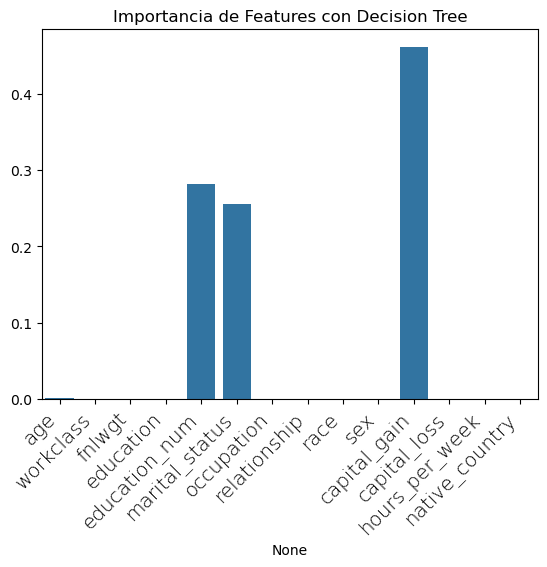

In [288]:
#Calculamos el feature importance
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances)
plt.title('Importancia de Features con Decision Tree')
plt.xticks(rotation=45, ha='right', fontweight='light', fontsize='x-large')
plt.show()

# Entrenamiento del modelo de clasificación con random forest

In [301]:
from sklearn.ensemble import RandomForestClassifier

#Instanciamos el modelo
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [302]:
#Realizamos la prediccion
y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)

# Evaluación del modelo de clasificación con random forest

In [303]:
from sklearn.metrics import accuracy_score

#Calculamos la exactitud
train_accuracy_forest = accuracy_score(y_train, y_train_pred_forest)
test_accuracy_forest = accuracy_score(y_test, y_test_pred_forest)

print(f'Exactitud en entrenamiento: {train_accuracy_forest} - Exactitud en test: {test_accuracy_forest}')

Exactitud en entrenamiento: 0.9888933094622373 - Exactitud en test: 0.8467463479415671


In [304]:
features_score = pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=False)
features_score

fnlwgt            0.174991
age               0.149429
capital_gain      0.116591
marital_status    0.096087
education_num     0.093988
hours_per_week    0.087751
occupation        0.068289
relationship      0.061906
capital_loss      0.038046
workclass         0.037673
education         0.027964
sex               0.017872
native_country    0.014872
race              0.014541
dtype: float64

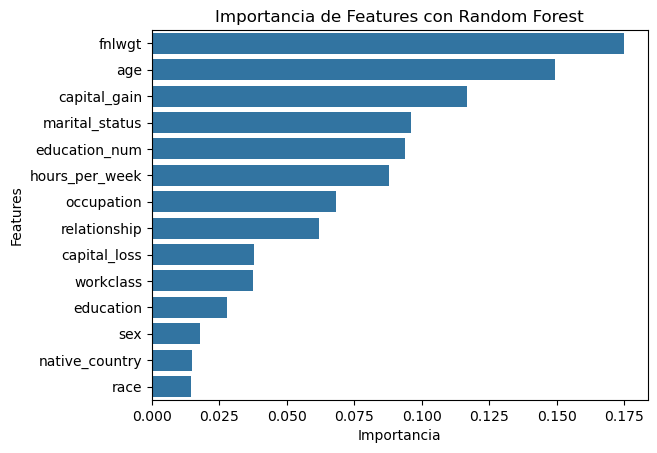

In [305]:
sns.barplot(x=features_score, y=features_score.index)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia de Features con Random Forest')
plt.show()

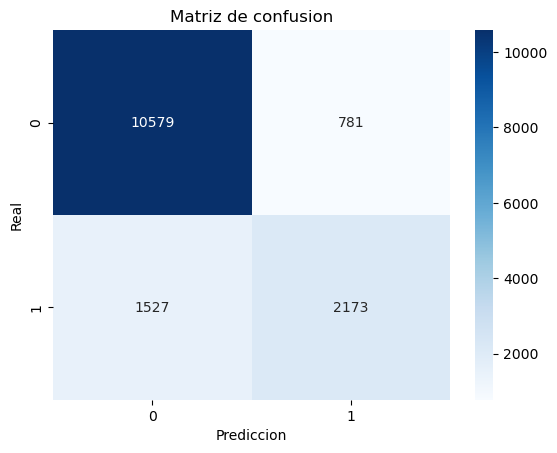

In [306]:
from sklearn.metrics import confusion_matrix

#Matriz de confusion
cm = confusion_matrix(y_test, y_test_pred_forest)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de confusion')
plt.show()


In [307]:
from sklearn.metrics import classification_report

#Reporte de clasificacion
print(classification_report(y_test, y_test_pred_forest))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11360
        >50K       0.74      0.59      0.65      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.76      0.78     15060
weighted avg       0.84      0.85      0.84     15060

